In [14]:
import numpy as np
from matplotlib import pyplot as plt 
from numpy import genfromtxt
import csv
import torch
import torchvision
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor

In [15]:
## Num Cores, Max Frequency, L1 Cache, L2Cache, L3 Cache, RAM. DRAM Frequency
hardware21 =  [ 4, 3800, 32, 256,  6144,  32, 2133]
hardware217 = [ 8, 4200, 32, 256,  8192,  64, 2133]
hardware229 = [16, 3000, 32, 256, 20480, 128, 2400]
hardware237 = [32, 3000, 32, 256, 20480, 256, 2400]

Iteration 1, loss = 50709901138.10406494
Iteration 2, loss = 34732009371.41139984
Iteration 3, loss = 33428988897.53684235
Iteration 4, loss = 31690766317.22578812
Iteration 5, loss = 29577753602.09635925
Iteration 6, loss = 25942289706.74293900
Iteration 7, loss = 17514526638.78907394
Iteration 8, loss = 8453379966.02438068
Iteration 9, loss = 5303633995.66844940
Iteration 10, loss = 3819004986.34638977
Iteration 11, loss = 2894994719.59360409
Iteration 12, loss = 2296366940.29152632
Iteration 13, loss = 1934823255.06535435
Iteration 14, loss = 1900538164.58511734
Iteration 15, loss = 1639073164.51854110
Iteration 16, loss = 1537487200.86268401
Iteration 17, loss = 1474826199.29322743
Iteration 18, loss = 1420637050.89041758
Iteration 19, loss = 1386608864.17787433
Iteration 20, loss = 1370461393.55811095
Iteration 21, loss = 1295984313.76836991
Iteration 22, loss = 1271597491.36304259
Iteration 23, loss = 1198438478.70466113
Iteration 24, loss = 1138603332.98238420
Iteration 25, loss

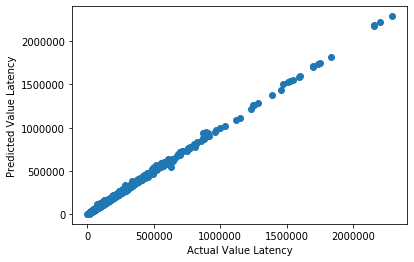

In [16]:
#### Learning Model for (21) i5-Machine
with open('21/1layer.csv', 'r') as f:
  reader = csv.reader(f)
  d = list(reader)
d = d[1:]
d = np.asarray(d, dtype=float)
onelayerdata = np.zeros((d.shape[0], d.shape[1]+2), dtype=float)
onelayerdata[:,:6]=d[:,:6]
onelayerdata[:,8:10]=d[:,6:9]
onelayerdata=onelayerdata[onelayerdata[:,0]==224]
d=genfromtxt('21/2layer.csv', delimiter=',')
d=d[:,:-1]
twolayerdata=d
d=genfromtxt('21/3layer.csv', delimiter=',')
d=d[:,:-1]
threelayerdata=d
totaldata=np.concatenate((onelayerdata, twolayerdata, threelayerdata))
hwfeatures=np.tile(hardware21, (len(totaldata),1) )
totaldata1 = np.hstack((hwfeatures, totaldata))

traindata = totaldata1
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]

dnn = MLPRegressor(hidden_layer_sizes=(400,400, 400), verbose=True, warm_start=True)
dnn.fit(trainf,trainy)
print('R2 Score = {}'.format(dnn.score(testf, testy)))
pred = dnn.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

Iteration 1, loss = 44499045427.41638184
Iteration 2, loss = 32536603196.55210495
Iteration 3, loss = 31452039510.89423370
Iteration 4, loss = 30181478229.37570190
Iteration 5, loss = 27379530246.89818954
Iteration 6, loss = 19467343288.00867462
Iteration 7, loss = 8419205630.22727585
Iteration 8, loss = 4635827535.62256718
Iteration 9, loss = 3073704074.91944265
Iteration 10, loss = 2316125708.43046093
Iteration 11, loss = 1928105195.05886960
Iteration 12, loss = 1711292699.02953172
Iteration 13, loss = 1626111345.79188228
Iteration 14, loss = 1519199672.57076812
Iteration 15, loss = 1584646996.13211870
Iteration 16, loss = 1530750607.49483681
Iteration 17, loss = 1535234291.47947383
Iteration 18, loss = 1548170084.38034630
Iteration 19, loss = 1593732313.08931422
Iteration 20, loss = 1475904339.35087752
Iteration 21, loss = 1476125046.98532057
Iteration 22, loss = 1565852091.68085432
Iteration 23, loss = 1509282082.76418209
Iteration 24, loss = 1492960126.16861272
Iteration 25, loss 

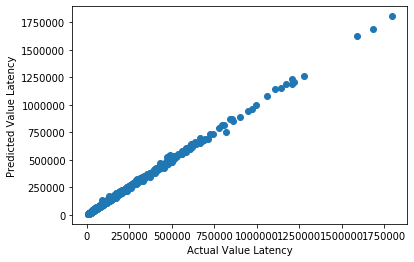

In [17]:
#### Learning Model for (217) i7-Machine
d=genfromtxt('217/2layer.csv', delimiter=',')
d=d[:,:-1]
twolayerdata=d
d=genfromtxt('217/3layer.csv', delimiter=',')
d=d[:,:-1]
threelayerdata=d
totaldata=np.concatenate((twolayerdata, threelayerdata))
hwfeatures=np.tile(hardware217, (len(totaldata),1) )
totaldata2 = np.hstack((hwfeatures, totaldata))

traindata = totaldata2
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]

dnn2 = MLPRegressor(hidden_layer_sizes=(400,400, 400), verbose=True, warm_start=True)
dnn2.fit(trainf,trainy)
print('R2 Score = {}'.format(dnn2.score(testf, testy)))
pred = dnn2.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()


R2 Score = 0.9654510997062351
RMSE Loss = 50948.26914395241


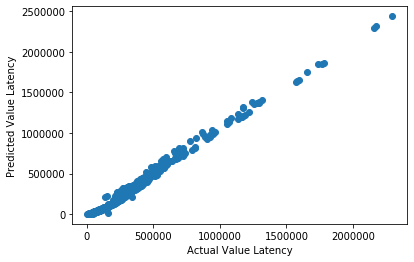

In [18]:
### Predicting i5 Values from i7 machine
traindata = totaldata1
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
print('R2 Score = {}'.format(dnn2.score(testf, testy)))
pred = dnn2.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

R2 Score = 0.9473986610318883
RMSE Loss = 59514.23557181758


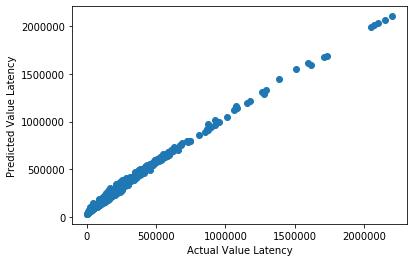

In [19]:
### Predicting i7 Values from i5 machine
traindata = totaldata2
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
print('R2 Score = {}'.format(dnn.score(testf, testy)))
pred = dnn.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

Iteration 198, loss = 301145249.58569318
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
R2 Score = 0.9950568448028992
RMSE Loss = 18115.726649795157


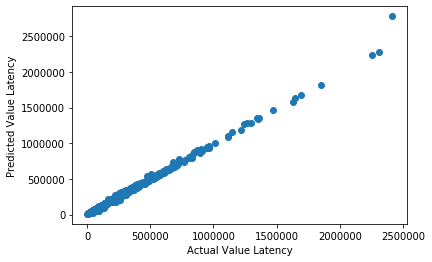

In [20]:
### Finetuning i5 on i7
traindata = totaldata1
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
dnn2.fit(trainf, trainy)
print('R2 Score = {}'.format(dnn2.score(testf, testy)))
pred = dnn2.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()


Iteration 141, loss = 363630089.47142261
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
R2 Score = 0.9976037825712746
RMSE Loss = 11817.222807669365


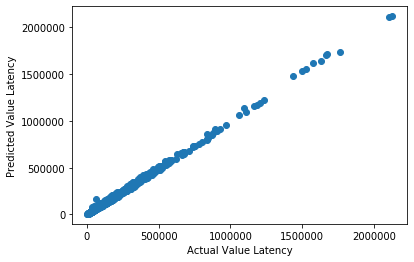

In [21]:
### Finetuning i7 on i5
traindata = totaldata2
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
dnn.fit(trainf, trainy)
print('R2 Score = {}'.format(dnn.score(testf, testy)))
pred = dnn.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

Iteration 1, loss = 25386764009.06880951
Iteration 2, loss = 20350325017.13827896
Iteration 3, loss = 20077826511.40789795
Iteration 4, loss = 19934030039.35935593
Iteration 5, loss = 19402483663.78422928
Iteration 6, loss = 18617106498.79056931
Iteration 7, loss = 16865083025.66699791
Iteration 8, loss = 11717903630.84029198
Iteration 9, loss = 5098142925.88824940
Iteration 10, loss = 3282414603.95878887
Iteration 11, loss = 2098946646.00872183
Iteration 12, loss = 1633748403.19710279
Iteration 13, loss = 1431337649.31462240
Iteration 14, loss = 1224153019.97358656
Iteration 15, loss = 1155842114.52918744
Iteration 16, loss = 1104460107.67452788
Iteration 17, loss = 1069727340.29288399
Iteration 18, loss = 1038598690.90276778
Iteration 19, loss = 1027236906.91505373
Iteration 20, loss = 1021031722.34059083
Iteration 21, loss = 1012195261.06259656
Iteration 22, loss = 1036805926.51775181
Iteration 23, loss = 1030800612.88498330
Iteration 24, loss = 1016343411.54323196
Iteration 25, los

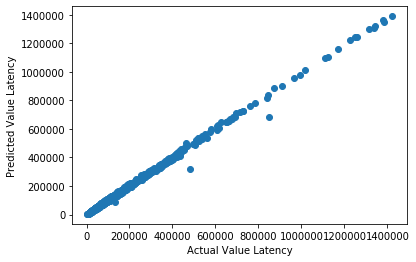

In [22]:
#### Learning Model for (229) Xeon-Machine
d=genfromtxt('229/2layer.csv', delimiter=',')
d=d[:,:-1]
twolayerdata=d
d=genfromtxt('229/3layer.csv', delimiter=',')
d=d[:,:-1]
threelayerdata=d
totaldata=np.concatenate((twolayerdata, threelayerdata))
hwfeatures=np.tile(hardware229, (len(totaldata),1) )
totaldata3 = np.hstack((hwfeatures, totaldata))

traindata = totaldata3
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]

dnn3 = MLPRegressor(hidden_layer_sizes=(400,400, 400), verbose=True, warm_start=True)
dnn3.fit(trainf,trainy)
print('R2 Score = {}'.format(dnn3.score(testf, testy)))
pred = dnn3.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()


R2 Score = 0.8843316276164013
RMSE Loss = 95068.2373181566


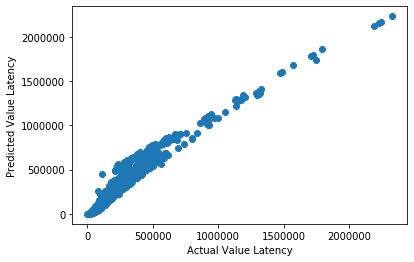

In [23]:
### Predict i5 from Xeon
traindata = totaldata1
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
print('R2 Score = {}'.format(dnn3.score(testf, testy)))
pred = dnn3.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

R2 Score = 0.9015342578740659
RMSE Loss = 75371.45734108813


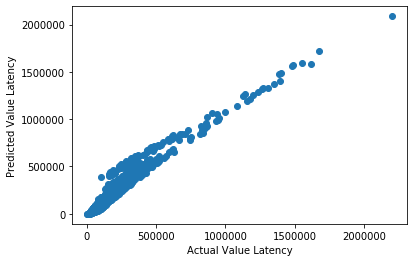

In [24]:
### Predict i7 from Xeon
traindata = totaldata2
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
print('R2 Score = {}'.format(dnn3.score(testf, testy)))
pred = dnn3.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

R2 Score = -36.73569834991376
RMSE Loss = 1182447.6194190045


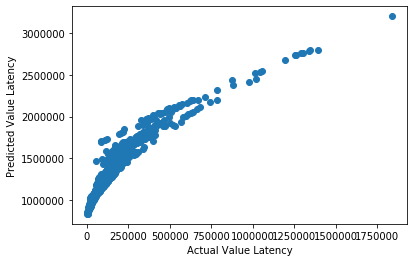

In [25]:
### Predict Xeon from Finetuned i5
traindata = totaldata3
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
print('R2 Score = {}'.format(dnn.score(testf, testy)))
pred = dnn.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

R2 Score = -7.336029413783869
RMSE Loss = 617169.9998622423


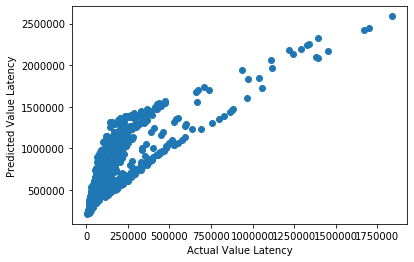

In [26]:
### Predict Xeon from Finetuned i7
traindata = totaldata3
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
print('R2 Score = {}'.format(dnn2.score(testf, testy)))
pred = dnn2.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

Iteration 201, loss = 1001488328.52819216
Iteration 202, loss = 284555444.58186269
Iteration 203, loss = 163596079.77297914
Iteration 204, loss = 142577118.69553706
Iteration 205, loss = 126515672.28766912
Iteration 206, loss = 119081214.60818389
Iteration 207, loss = 107685134.00660890
Iteration 208, loss = 100365975.49808098
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
R2 Score = 0.9974307836224239
RMSE Loss = 12661.842544191846


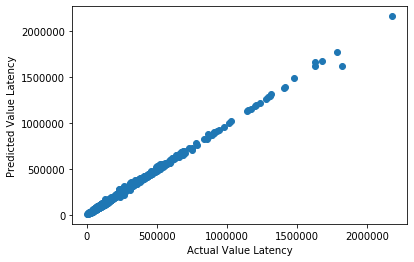

In [27]:
### Finetune i5 on Xeon
traindata = totaldata1
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
dnn3.fit(trainf, trainy)
print('R2 Score = {}'.format(dnn3.score(testf, testy)))
pred = dnn3.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

Iteration 209, loss = 166225372.71296895
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
R2 Score = 0.9982191055615687
RMSE Loss = 10972.815500048517


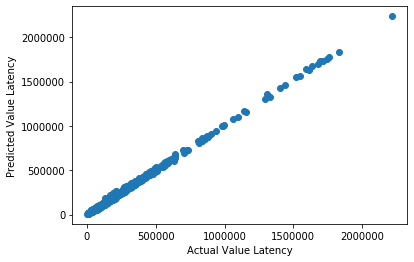

In [28]:
### Finetune i7 on Xeon
traindata = totaldata2
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
dnn3.fit(trainf, trainy)
print('R2 Score = {}'.format(dnn3.score(testf, testy)))
pred = dnn3.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

Iteration 142, loss = 77302683251.62788391
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
R2 Score = -0.36573865261481364
RMSE Loss = 227348.176248206


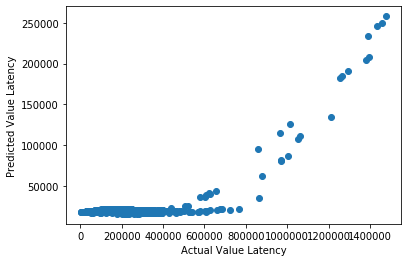

In [29]:
### Finetune Xeon on Finetuned i5
traindata = totaldata3
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
dnn.fit(trainf, trainy)
print('R2 Score = {}'.format(dnn.score(testf, testy)))
pred = dnn.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()

Iteration 199, loss = 32967338498.93980408
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
R2 Score = 0.567832601243698
RMSE Loss = 134869.2163641568


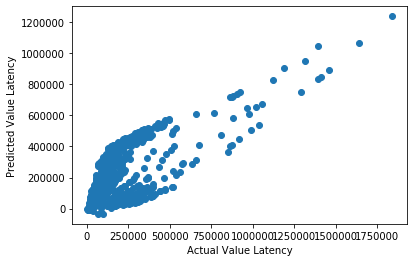

In [30]:
### Finetune Xeon on Finetuned i7
traindata = totaldata3
features = traindata[:,:15]
values= traindata[:,15]
features, values = shuffle(features,values)
trainf = features[:int(0.85*len(features))]
trainy = values[:int(0.85*len(features))]
testf = features[int(0.85*len(features)):]
testy = values[int(0.85*len(features)):]
dnn2.fit(trainf, trainy)
print('R2 Score = {}'.format(dnn2.score(testf, testy)))
pred = dnn2.predict(testf)
print('RMSE Loss = {}'.format(np.sqrt(np.mean((testy-pred)**2))))
plt.xlabel("Actual Value Latency")
plt.ylabel("Predicted Value Latency")
plt.scatter(testy, pred)
plt.show()